In [1]:
#imports
import pandas as pd
import copy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import KFold, train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [2]:
df=pd.read_csv("../../documents/mlFiles/USArrests.csv")
display(df.shape)
display(df.columns)
display(df.head(3))
display(df.index.values,)#notice that the states are not shown as indices as is in the csv file
#change the display statements to print and see what happens

(50, 5)

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [3]:
df=pd.read_csv("../../documents/mlFiles/USArrests.csv",index_col=False)#the states are now viewable as a column
df.rename(columns={'Unnamed: 0':'State'}, inplace=True)#rename the column
display(df.head(1))

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2


In [4]:
#shift the columns
#method1
df=df[["State","Murder","Assault","Rape","UrbanPop"]] 

#method2
"""
cols=list(df.columns)
i= len(cols)-1# or cols.index("Rape")
j=len(cols)-2# or cols.index("UrbanPop")
cols[i], cols[j] = cols[j], cols[i]
print(cols)
df.columns=cols;
"""
df.head(1)

,State,Murder,Assault,Rape,UrbanPop
0,Alabama,13.2,236,21.2,58


In [5]:
#re-index the df
df.set_index("State",inplace=True)
#alternative
df.head(3)

,Murder,Assault,Rape,UrbanPop
State,,,,
Alabama,13.2,236,21.2,58
Alaska,10.0,263,44.5,48
Arizona,8.1,294,31.0,80


In [6]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

#sort dataFrame by UrbanPop column
#df[columnName] does not return a data frame but df[[columnName]] does

dfMurder=df[["Murder"]].sort_values(by="Murder", ascending=False)
dfAssault=df[["Assault"]].sort_values(by="Assault",ascending=False)
dfRape=df[["Rape"]].sort_values(by="Rape",ascending=False)
dfUrban=df[["UrbanPop"]].sort_values(by="UrbanPop",ascending=False) 
display_side_by_side(dfMurder.head(10),dfAssault.head(10),dfRape.head(10),dfUrban.head(10))

,Murder
State,
Georgia,17.4
Mississippi,16.1
Florida,15.4
Louisiana,15.4
South Carolina,14.4
Alabama,13.2
Tennessee,13.2
North Carolina,13.0
Texas,12.7


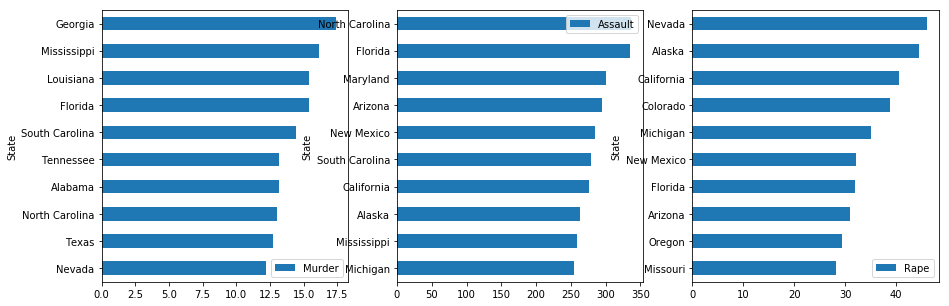

In [7]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
dfMurder.iloc[:10].sort_values('Murder', ascending=True).plot.barh(ax=ax[0])
dfAssault.iloc[:10].sort_values('Assault', ascending=True).plot.barh(ax=ax[1])
dfRape.iloc[:10].sort_values('Rape', ascending=True).plot.barh(ax=ax[2])

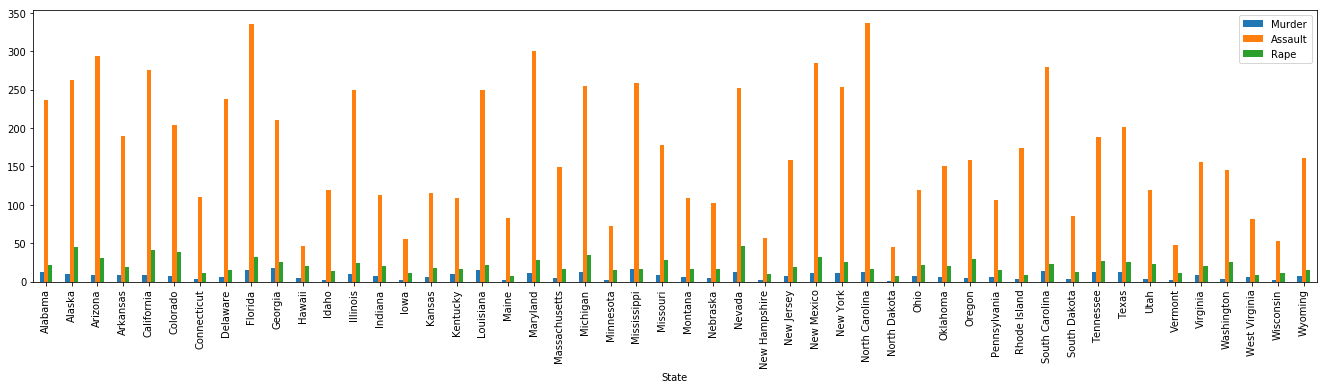

In [8]:
df.iloc[:,0:3].plot.bar(figsize=(23,5))

In [9]:
def makePie(stateName):
    df.loc[stateName,'Murder':'Rape'].plot.pie()
def makeBoxPlot(category):
    sns.boxplot(df[category])
def makeScatterPlot(category):
    plt.scatter(x=df[category],y=df["UrbanPop"])
    #note:pandas column names are case-sensitive

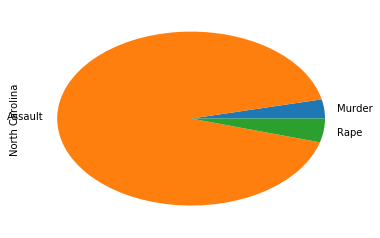

In [10]:
makePie("North Carolina")

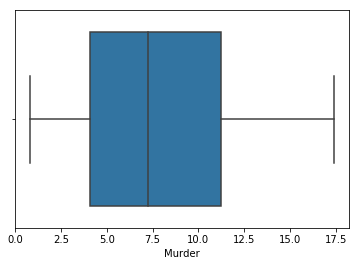

In [11]:
makeBoxPlot("Murder")

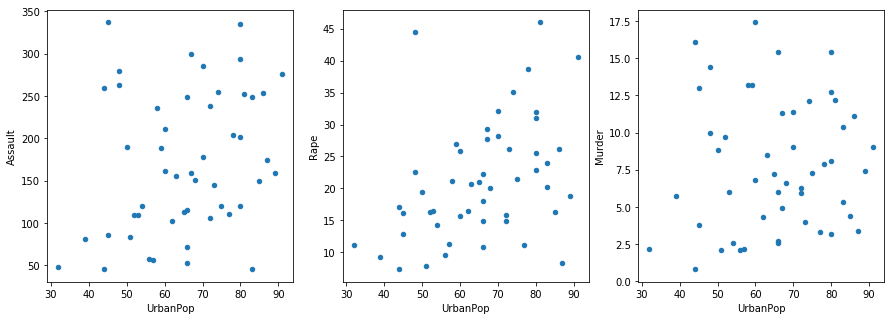

In [12]:
# display_side_by_side(makeScatterPlot("Rape")) gives 'NoneType' object has no attribute 'to_html'
fig,ax=plt.subplots(1,3,figsize=(15,5))
"""
the lines of code below generate the error:  inner() got multiple values for keyword argument 'ax'
plt.scatter(x=df["Assault"],y=df["UrbanPop"],ax=ax[0])
plt.scatter(x=df["Rape"],y=df["UrbanPop"],ax=ax[1])
plt.scatter(x=df["Murder"],y=df["UrbanPop"],ax=ax[2])

"""
# df.plot.scatter(x=df["Rape"],y=df["UrbanPop"],ax=ax[0]) generates a key error
df.plot.scatter(x="UrbanPop",y="Assault",ax=ax[0])
df.plot.scatter(x="UrbanPop",y="Rape",ax=ax[1])
df.plot.scatter(x="UrbanPop",y="Murder",ax=ax[2])

#Styling Scatter Plots


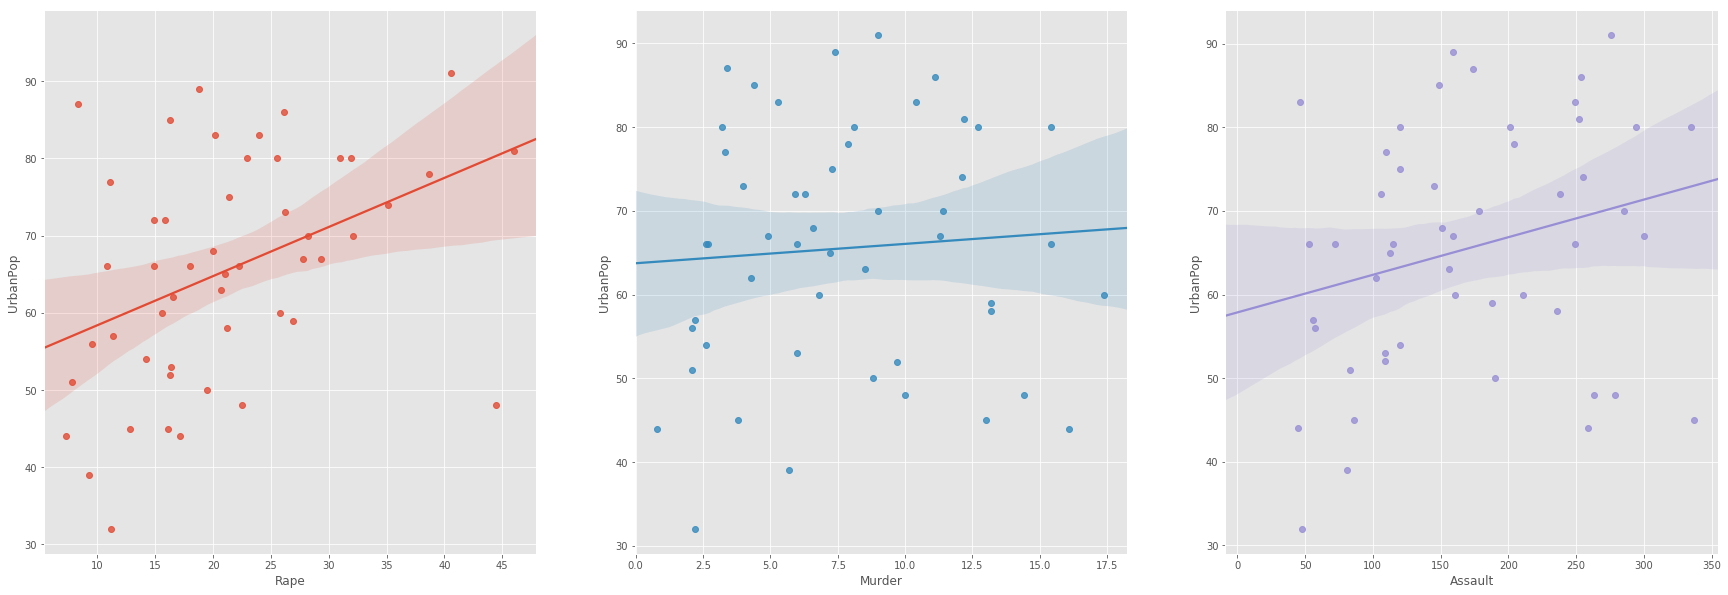

In [13]:
"""
plotting with seaborn
"""
plt.style.use('ggplot')
fig,ax=plt.subplots(1,3,figsize=(30,10))
sns.regplot(x=df["Rape"], y=df["UrbanPop"],ax=ax[0])
sns.regplot(x=df["Murder"], y=df["UrbanPop"],ax=ax[1])
sns.regplot(x=df["Assault"], y=df["UrbanPop"],ax=ax[2])

In [14]:
pop=df["UrbanPop"]
display(np.corrcoef(df["Assault"], pop))
display(np.corrcoef(df["Rape"], pop))
display(np.corrcoef(df["Murder"], pop))
display(np.corrcoef(pop, pop))

array([[1.       , 0.2588717],
       [0.2588717, 1.       ]])

array([[1.        , 0.41134124],
       [0.41134124, 1.        ]])

array([[1.        , 0.06957262],
       [0.06957262, 1.        ]])

array([[1., 1.],
       [1., 1.]])

In [15]:
#add regions column
stateRegionsDf=pd.read_csv("../../documents/mlFiles/stateRegions.csv")
stateRegionsDf.head(5)

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


In [16]:
stateRegionsDf=stateRegionsDf.sort_values("State")
stateRegionsDf.head(5)

,State,State Code,Region,Division
1,Alabama,AL,South,East South Central
0,Alaska,AK,West,Pacific
3,Arizona,AZ,West,Mountain
2,Arkansas,AR,South,West South Central
4,California,CA,West,Pacific


In [17]:
df=df.reset_index().join(stateRegionsDf.loc[:,["Region"]])
df.head(5)

,State,Murder,Assault,Rape,UrbanPop,Region
0,Alabama,13.2,236,21.2,58,West
1,Alaska,10.0,263,44.5,48,South
2,Arizona,8.1,294,31.0,80,South
3,Arkansas,8.8,190,19.5,50,West
4,California,9.0,276,40.6,91,West


In [18]:
#add 2 columns from opoidDf dataset
opoidDf=pd.read_csv("../../documents/mlFiles/opoidDeaths2016.csv")
display_side_by_side(opoidDf.head(10),df.head(10))
#python merge vs join
df=df.reset_index().join(opoidDf.iloc[:,1:3])
display(df.head(10))

,STATE,RATE,DEATHS,URL
0,AL,16.2,756,/nchs/pressroom/states/alabama/alabama.htm
1,AK,16.8,128,/nchs/pressroom/states/alaska/alaska.htm
2,AZ,20.3,"1,382",/nchs/pressroom/states/arizona/arizona.htm
3,AR,14.0,401,/nchs/pressroom/states/arkansas/arkansas.htm
4,CA,11.2,"4,654",/nchs/pressroom/states/california/california.htm
5,CO,16.6,942,/nchs/pressroom/states/colorado/colorado.htm
6,CT,27.4,971,/nchs/pressroom/states/connecticut/connecticut...
7,DE,30.8,282,/nchs/pressroom/states/delaware/delaware.htm
8,FL,23.7,"4,728",/nchs/pressroom/states/florida/florida.htm
9,GA,13.3,"1,394",/nchs/pressroom/states/georgia/georgia.htm


,index,State,Murder,Assault,Rape,UrbanPop,Region,RATE,DEATHS
0,0,Alabama,13.2,236,21.2,58,West,16.2,756
1,1,Alaska,10.0,263,44.5,48,South,16.8,128
2,2,Arizona,8.1,294,31.0,80,South,20.3,"1,382"
3,3,Arkansas,8.8,190,19.5,50,West,14.0,401
4,4,California,9.0,276,40.6,91,West,11.2,"4,654"
5,5,Colorado,7.9,204,38.7,78,West,16.6,942
6,6,Connecticut,3.3,110,11.1,77,Northeast,27.4,971
7,7,Delaware,5.9,238,15.8,72,South,30.8,282
8,8,Florida,15.4,335,31.9,80,South,23.7,"4,728"
9,9,Georgia,17.4,211,25.8,60,South,13.3,"1,394"


In [19]:
df.set_index("State",inplace=True)
df.head(5)

,index,Murder,Assault,Rape,UrbanPop,Region,RATE,DEATHS
State,,,,,,,,
Alabama,0,13.2,236,21.2,58,West,16.2,756
Alaska,1,10.0,263,44.5,48,South,16.8,128
Arizona,2,8.1,294,31.0,80,South,20.3,"1,382"
Arkansas,3,8.8,190,19.5,50,West,14.0,401
California,4,9.0,276,40.6,91,West,11.2,"4,654"


In [20]:
df=df.drop(['index'],axis=1)

In [21]:
df.head(3)

,Murder,Assault,Rape,UrbanPop,Region,RATE,DEATHS
State,,,,,,,
Alabama,13.2,236,21.2,58,West,16.2,756
Alaska,10.0,263,44.5,48,South,16.8,128
Arizona,8.1,294,31.0,80,South,20.3,"1,382"


In [22]:
"""
List of plots to use for Visualization :
_sns distplot
_sns countplots and barplot per region
_violin plots
_stacked bar plots
_kde plot
"""

'\nList of plots to use for Visualization :\n_sns distplot\n_sns countplots and barplot per region\n_violin plots\n_stacked bar plots\n_kde plot\n'

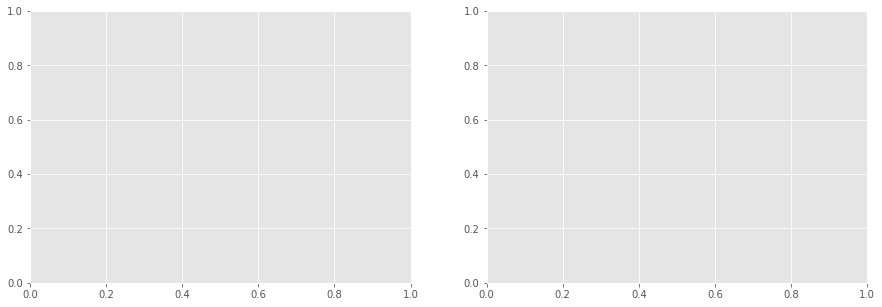

In [23]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
#sns.barplot(y="Region",data=df,ax=ax[0]) another categorical variable is needed
#(so as to calculate death range per region for example)
#next time choose a dataset with more varities of variables

In [24]:
"""
since we need to create a categorical feature, we need to 
see the distribution (via a density plot) of our continuous variables
"""
#fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
# sns.distplot(df["DEATHS"], ax=ax[0])#error unsupported operand type(s) for /: 'str' and 'int'
#convert "DEATHS" column to int
#df["DEATHS"]=df["DEATHS"].astype(float)#could not convert string to float: '1,074'

#we need to remove the commas from the DEATH column
df["DEATHS"]=df["DEATHS"].str.replace(',','').astype(int)

In [43]:
display(df.head(3))

,Murder,Assault,Rape,UrbanPop,Region,RATE,DEATHS
State,,,,,,,
Alabama,13.2,236,21.2,58,West,16.2,756
Alaska,10.0,263,44.5,48,South,16.8,128
Arizona,8.1,294,31.0,80,South,20.3,1382


,Murder,Assault,Rape,UrbanPop,Region,RATE,DEATHS
State,,,,,,,
Alabama,13.2,236,21.2,58,West,16.2,756
Alaska,10.0,263,44.5,48,South,16.8,128
Arizona,8.1,294,31.0,80,South,20.3,1382


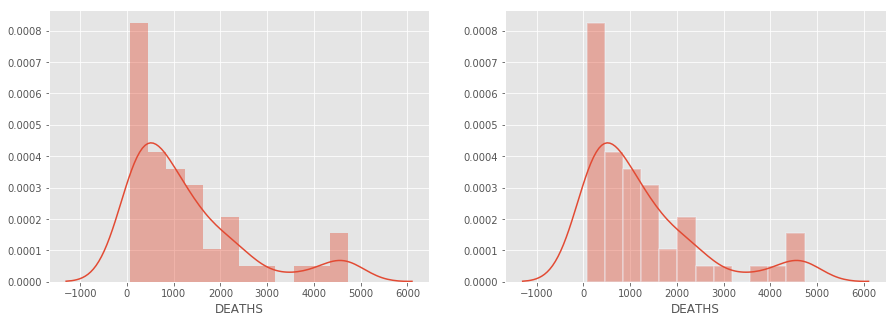

In [42]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.distplot(df["DEATHS"],bins=12,ax=ax[0])
sns.distplot(df["DEATHS"],bins=12,ax=ax[1],hist_kws=dict(edgecolor="#F0F8FF", linewidth=1.5))
#how to outline bins in sns (so as to make ranges more obvious)
    #use hist kws (with edgecolor and linewidth args)
    #colors in sns: https://matplotlib.org/mpl_examples/color/named_colors.hires.png
    #or use the html's name or hex value. The same colors can be used in matplotlib



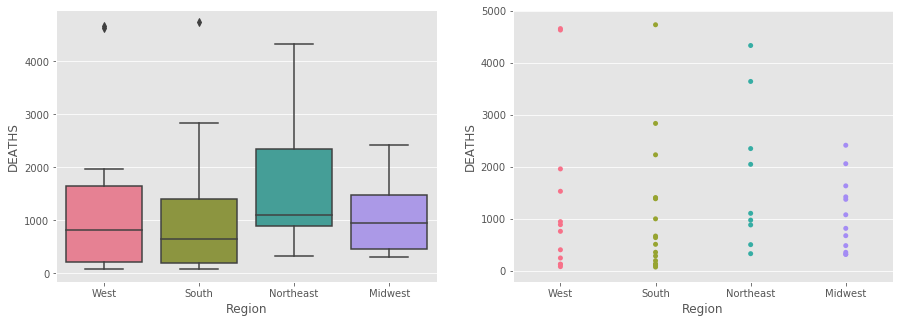

In [61]:
#box and whisker plot for opoid deaths per region
#ax = sns.boxplot(x="Region", y="DEATHS", data=df,color_palette="blues") #boxplot() got an unexpected keyword argument 'color_palette'
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.boxplot(x="Region", y="DEATHS", data=df,palette="husl",ax=ax[0])
sns.stripplot(x="Region", y="DEATHS", data=df,palette="husl",ax=ax[1])
"""
in each region, it seems like 1 or 2 states are outliers.
A better way to bin the data will be to first determine opoid deaths
relative to population
"""

In [68]:
"""
basic stats observations using loc, iloc, groupby etc
"""
#state with highest opoid deaths by region


4728 1267.26


In [74]:
region_groups=df.groupby("Region")


Assault                                                             \
            count        mean        std    min     25%    50%    75%    max   
Region                                                                         
Midwest      12.0  137.166667  72.550714   53.0   68.25  133.0  180.5  259.0   
Northeast     9.0  213.555556  75.791014  110.0  145.00  254.0  279.0  300.0   
South        17.0  183.058824  81.256900   46.0  120.00  161.0  249.0  335.0   
West         12.0  154.833333  93.017919   45.0   96.75  116.5  212.0  337.0   

          DEATHS               ...    Rape       UrbanPop             \
           count         mean  ...     75%   max    count       mean   
Region                         ...                                     
Midwest     12.0  1075.500000  ...   21.00  28.2     12.0  64.666667   
Northeast    9.0  1792.888889  ...   27.80  35.1      9.0  73.000000   
South       17.0  1059.411765  ...   29.30  46.0     17.0  67.882353   
West        12.0  1359.250000  ...   21.05  40.6     12.0  57.500000   

                                                      
                 std   min    25%   50%    75%   max  
Region                                                
Midwest    12.528755  44.0  56.75  66.0  68.50  89.0  
Northeast  11.489125  48.0  70.00  74.0  77.00  87.0  
South      13.406539  45.0  60.00  67.0  80.00  85.0  
West       17.133168  32.0  44.75  56.0  66.75  91.0  

[4 rows x 48 columns]

,Murder,Assault,Rape,UrbanPop,RATE,DEATHS
Region,,,,,,
Midwest,7.333333,137.166667,17.983333,64.666667,20.816667,1075.500000
Northeast,8.700000,213.555556,23.400000,73.000000,25.633333,1792.888889
South,8.358824,183.058824,23.805882,67.882353,18.923529,1059.411765
West,6.750000,154.833333,19.208333,57.500000,20.500000,1359.250000


In [ ]:
#http://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python/

In [ ]:
#how many bins should the opoid death columns be placed into?